In [1]:
import AMC
import numpy as np
import perturbations as PB
from tqdm import tqdm
import mass_function


In [2]:
import matplotlib.pyplot as plt

In [3]:
in_maeV   = 20e-6        # axion mass in eV
in_gg     = -0.7        

AMC_MF = mass_function.PowerLawMassFunction(m_a = in_maeV, gamma = in_gg)

In [6]:
minicluster = AMC.AMC(M = 1e-19, delta=20, profile="PL")
G_N = 4.320e-3

In [82]:
print(minicluster.R)

1.1031911247800166e-10


In [83]:
M_AMC_list = np.geomspace(1e-19, 1e-5)
R_AS_list = 1e-11*(M_AMC_list)**(-1/3)

In [93]:
R_AMC_list = 0*M_AMC_list
for i, M_i in enumerate(M_AMC_list):
    minicluster = AMC.AMC(M = M_i, delta=10, profile="NFW")
    R_AMC_list[i] = minicluster.R

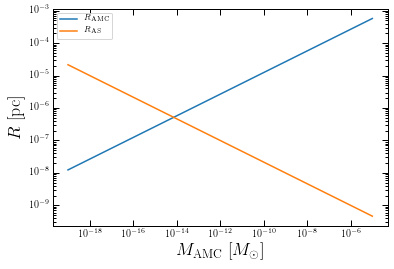

In [94]:
plt.figure()


plt.loglog(M_AMC_list, R_AMC_list, label=r'$R_\mathrm{AMC}$')
plt.loglog(M_AMC_list, R_AS_list, label=r'$R_\mathrm{AS}$')

plt.xlabel(r'$M_\mathrm{AMC}$ [$M_\odot$]')
plt.ylabel(r'$R$ [pc]')

plt.legend()

plt.savefig("../plots/AS_delta=10.pdf")

plt.show()

In [47]:
print(np.sqrt(G_N*minicluster.M/minicluster.R))

0.013879376156488911


In [4]:
print(minicluster.R*3.086e+13/np.sqrt(G_N*minicluster.M/minicluster.R)/(3e7))

16620.671866538938


In [5]:
1e10/1e4

1000000.0

#### Calculating initial fractions passing cuts

In [8]:
def r_AS(M_AMC):
    m_22 = in_maeV/1e-22
    return 1e3*(1.6/m_22)*(M_AMC/1e9)**(-1/3)

In [36]:
N_samps = int(1e7)
_, delta_list = PB.sample_AMCs_logflat(m_a = 2e-5, n_samples = N_samps) 
#p_target = AMC_MF.dPdlogM(M_list)
logM_list = PB.inverse_transform_sampling(lambda x: AMC_MF.dPdlogM(np.exp(x)), [np.log(AMC_MF.mmin), np.log(AMC_MF.mmax)], nbins=10000, n_samples=N_samps)
M_list = np.exp(logM_list)
#w = p_target/np.sum(p_target)
mask_AS = M_list*0.0
for i in tqdm(range(N_samps)):
    minicluster = AMC.AMC(M = M_list[i], delta=delta_list[i], profile="NFW")
    mask_AS[i] = r_AS(M_list[i]) < minicluster.R
print(mask_AS)
print(np.sum(mask_AS)/N_samps)

100%|██████████| 10000000/10000000 [01:52<00:00, 88663.69it/s]

[0. 0. 0. ... 0. 0. 0.]
0.0146342
